# PCA Project Check-In Week 7: PCA

Objective:
To find the Principal Component Analysis (PCA) of the spotify data and come up with some meaningful "summary music" features that can be used to summarize the music features in each genre.


In [1]:
#import libaries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

In [2]:
#Load data
data = pd.read_excel("/Users/chelsea.lai/Desktop/M148_Project/hannah/clean_data.xlsx", index_col=-1)
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,,,,,,,,
acoustic,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
acoustic,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
acoustic,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
acoustic,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
acoustic,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [3]:
#Remove nominal categorical variables
data = data.drop(data.columns[[0]], axis=1)
data = data.drop(columns=['track_id', 'artists', 'album_name','track_name'])

#convert explicit to binary variables
data['explicit'] = data['explicit'].astype(int)
data

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,,,
acoustic,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
acoustic,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
acoustic,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
acoustic,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world-music,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
world-music,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
world-music,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4


In [4]:
# Save the original column names and index
original_columns = data.columns
original_index = data.index

#Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame with original names
scaled_data = pd.DataFrame(scaled_data, columns=original_columns, index=original_index)

#print shape
scaled_data.shape

# Subset the data to only the following genres: [acoustic, afrobeat, alt-rock, alternative, ambient, anime, black-metal, bluegrass, blues]
genre= ["acoustic", "afrobeat", "alt-rock", "alternative", "ambient", "anime", "black-metal", "bluegrass", "blues", "world-music"]
sampled_df = scaled_data.loc[genre]
sampled_df.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_genre,,,,,,,,,,,,,,,
acoustic,1.930051,0.010591,-0.306745,0.638193,-0.691646,-1.203957,0.328521,-1.323494,0.499828,-0.870854,-0.531799,0.731408,0.928335,-1.161939,0.215635
acoustic,1.056275,-0.716010,-0.306745,-0.827986,-1.850606,-1.203957,-1.716915,0.755576,-0.097263,1.777853,-0.531785,-0.594089,-0.781057,-1.513267,0.215635
acoustic,1.153361,-0.167259,-0.306745,-0.724896,-1.092371,-1.484822,-0.254162,0.755576,-0.281672,-0.342776,-0.531802,-0.511568,-1.341951,-1.552247,0.215635
acoustic,1.832965,-0.246977,-0.306745,-1.709985,-2.268617,-1.484822,-1.966525,0.755576,-0.455338,1.721421,-0.531583,-0.434205,-1.254192,1.999035,-2.963254
acoustic,2.366939,-0.274587,-0.306745,0.306011,-0.762362,-0.923093,-0.243827,0.755576,-0.309422,0.426471,-0.531802,-0.687442,-1.162617,-0.082755,0.215635


Apply principal component analysis to the scaled and uncentered data

In [5]:
pca_U, pca_d, pca_V = np.linalg.svd(sampled_df)

In [6]:
print("pca_U: " + str(pca_U.shape))
print("pca_d: "+ str(pca_d.shape))
print("pca_V: "+ str(pca_V.shape))

pca_U: (9149, 9149)
pca_d: (15,)
pca_V: (15, 15)


In [7]:
#diagonal matrix
pca_d

array([184.61565264, 131.97158013, 105.35822726, 101.58924069,
        97.60086045,  92.19389324,  90.78408636,  83.39387307,
        81.8265511 ,  78.3066658 ,  71.52464794,  59.78957733,
        53.76485111,  49.36728937,  34.5681638 ])

The code below shows that the first principal component explains r round(pca$d[1]^2 / sum(pca$d^2), 2) * 100% of the total variability (relative to zero) in the data.

In [8]:
prop_var = np.square(pca_d) / sum(np.square(pca_d))
pd.DataFrame(
    {"PC": 1 + np.arange(0, prop_var.shape[0]),
     "variability_explained": prop_var.round(2),
     "cumulative_variability_explained": prop_var.cumsum().round(2)
     }).head(5)

,PC,variability_explained,cumulative_variability_explained
0,1,0.25,0.25
1,2,0.13,0.38
2,3,0.08,0.47
3,4,0.08,0.54
4,5,0.07,0.61


Scree Plot

In [9]:
px.line(x=np.arange(prop_var .shape[0]),
        y=prop_var ,
        labels={"x": "PC",
                "y": "Proportion explained"})

There is a very clear elbow at the first PC, which implies that taking the first (and maybe second) PC corresponds to a reasonable summary of the dataset.

The following table shows the 10 variables with the highest loading on PC1. PC1 mostly seems to be capturing energy

In [10]:
# put the loadings for PC1 in a data frame
loadings1 = pd.DataFrame(
    {"music feature": sampled_df.columns,
     "pc1_loading": pca_V[0]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings1.reindex(loadings1["pc1_loading"].abs().sort_values(ascending=False).index) \
    .head(10)


,music feature,pc1_loading
6,loudness,0.511492
4,energy,0.484069
9,acousticness,-0.410038
10,instrumentalness,-0.331470
12,valence,0.303480
3,danceability,0.237765
14,time_signature,0.155607
13,tempo,0.128334
11,liveness,0.110840
8,speechiness,0.091431


The following table shows the 10 variables with the highest loading on PC2. PC2 mostly seems to be capturing danceability

In [11]:
# put the loadings for PC2 in a data frame
loadings2 = pd.DataFrame(
    {"music feature": sampled_df.columns,
     "pc2_loading": pca_V[1]
     })
# look at the 10 largest (absolute value) loadings for PC1 but print out the signed value
loadings2.reindex(loadings2["pc2_loading"].abs().sort_values(ascending=False).index) \
    .head(10)

,music feature,pc2_loading
3,danceability,-0.569149
12,valence,-0.467379
9,acousticness,-0.354896
1,duration_ms,0.315932
4,energy,0.268238
10,instrumentalness,0.221962
13,tempo,0.210576
14,time_signature,-0.184226
6,loudness,0.129193
11,liveness,0.107351


Now, we can create a version of the spotify dataset that has been transformed into PC space. This involves multiplying the original data matrix with the PC loading matrix. The resulting dataset (`pca_scaled_x`) has one row for each genre item, but instead of the music features as columns, it has the PCs.

In [12]:
# create the PCA-transformed dataset

# multiply the original data and the PCA loadings
pca_scaled_x = sampled_df@pca_V.T
# make the data frame pretty and easier to work with by
# changing the column names to PC1, PC2, etc
pca_scaled_x.columns = ["PC" + str(1 + col) for col in pca_scaled_x.columns]

# look at the object
pca_scaled_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
track_genre,,,,,,,,,,,,,,,
acoustic,0.596579,-0.797686,0.118072,1.626014,-1.170908,1.617196,-0.959706,-1.008099,0.276802,0.856706,0.021665,0.380582,-0.524823,0.189578,1.121364
acoustic,-3.181951,-1.255396,-1.054714,1.758059,0.169574,0.068747,-0.354481,-0.077251,0.212941,-0.469746,-0.757879,0.545800,-0.106701,0.573277,-0.077637
acoustic,-1.370832,0.276498,-1.026234,2.375173,0.087362,0.373227,-0.939620,0.445044,-0.039738,-0.405016,-0.705488,-0.105612,-0.536626,0.001535,0.410887
acoustic,-3.977116,0.871333,-3.863699,-0.928167,-0.850483,1.213337,0.668857,-0.612047,0.594690,-0.080132,-0.222894,0.492392,-0.373735,0.205367,-0.046964
acoustic,-1.141438,-0.281415,-1.600861,1.948170,-1.212416,0.702003,0.374727,0.306172,-0.260099,-0.164908,-0.102131,-0.525321,0.031800,-0.004837,-0.218668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world-music,-3.309498,1.338329,1.968952,2.063355,1.675154,-1.316420,2.564528,1.191808,0.553901,0.080041,0.400065,0.187993,0.229366,-0.212932,0.497617
world-music,-4.880646,1.247532,1.620326,0.745609,1.223250,0.779338,-0.409834,0.397326,1.389354,0.360257,0.210211,0.682282,0.763531,-0.170668,0.330596
world-music,-0.952648,-1.625843,-0.127600,-0.290248,0.477926,1.218172,0.227244,0.294693,2.105058,0.564534,0.028599,0.742418,0.400407,-0.287587,0.067096


Visualize songs in PC space. The figure below shows the distribution of songs in the (PC1, PC2) space. Overall, it seems as though there is very little information in PC2 (the spread is mostly in the PC1 direction).

In [13]:

colors ={ "afrobeat":'tab:blue', 'acoustic':'tab:orange', 'alt-rock':'tab:green', 'alternative':'tab:red',
       'ambient':'tab:purple', 'black-metal':'tab:brown', 'anime':'tab:pink', 'bluegrass':'tab:gray',
       'blues':'tab:olive', 'world-music':'tab:cyan'}

sampled_df['color'] = sampled_df.index.map(colors)

# Plot PC1 vs PC2
fig = px.scatter(pca_scaled_x, x="PC1", y="PC2",
                 opacity=0.2,
                 hover_name=sampled_df.index,
                 color=sampled_df['color'])  # Use 'color' column for color coding

fig.show()


Explain how you are using PCA in your project for dimensionality reduction or to learn structure in the data.

Dimensionality reduction is necessary for high-dimensional data with many features (such as thousands of variables) compared to rows. However, in this case, we only have 15 features thus it is not necessary for us to perform dimensionality reduction. Instead, we will be using PCA to learn the structure of the data; more specifically, for feature selection. In the variable loading table for PC1, the top 5 features with the highest loadings were loudness, energy, acousticness, instrumentalness, and valence. We can perform PCA with just these features to see if there is a more distinct grouping amongst the genres. 

In [14]:
#subset data to only the 5 features:
data = data[['loudness', 'energy', 'acousticness','instrumentalness', 'valence']]

# Save the original column names and index
original_columns = data.columns
original_index = data.index

#Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame with original names
scaled_data = pd.DataFrame(scaled_data, columns=original_columns, index=original_index)

#print shape
scaled_data.shape

# Subset the data to only the following genres: [acoustic, afrobeat, alt-rock, alternative, ambient, anime, black-metal, bluegrass, blues]
genre= ["acoustic", "afrobeat", "alt-rock", "alternative", "ambient", "anime", "black-metal", "bluegrass", "blues", "world-music"]
sampled_df = scaled_data.loc[genre]
sampled_df.head()


,loudness,energy,acousticness,instrumentalness,valence
track_genre,,,,,
acoustic,0.328521,-0.691646,-0.870854,-0.531799,0.928335
acoustic,-1.716915,-1.850606,1.777853,-0.531785,-0.781057
acoustic,-0.254162,-1.092371,-0.342776,-0.531802,-1.341951
acoustic,-1.966525,-2.268617,1.721421,-0.531583,-1.254192
acoustic,-0.243827,-0.762362,0.426471,-0.531802,-1.162617


In [15]:
pca_U, pca_d, pca_V = np.linalg.svd(sampled_df)

In [16]:
prop_var = np.square(pca_d) / sum(np.square(pca_d))
pd.DataFrame(
    {"PC": 1 + np.arange(0, prop_var.shape[0]),
     "variability_explained": prop_var.round(2),
     "cumulative_variability_explained": prop_var.cumsum().round(2)
     }).head(5)

,PC,variability_explained,cumulative_variability_explained
0,1,0.57,0.57
1,2,0.21,0.78
2,3,0.14,0.92
3,4,0.05,0.97
4,5,0.03,1.00


In [17]:
# create the PCA-transformed dataset

# multiply the original data and the PCA loadings
pca_scaled_x = sampled_df@pca_V.T
# make the data frame pretty and easier to work with by
# changing the column names to PC1, PC2, etc
pca_scaled_x.columns = ["PC" + str(1 + col) for col in pca_scaled_x.columns]

# look at the object
pca_scaled_x

,PC1,PC2,PC3,PC4,PC5
track_genre,,,,,
acoustic,-0.656420,-0.699809,-0.144355,0.728286,-1.008685
acoustic,2.798678,-1.221344,0.983739,0.209659,0.300284
acoustic,0.742476,0.274729,1.513794,0.510015,-0.529697
acoustic,3.261344,-1.049343,1.381110,0.407498,0.147340
acoustic,0.872313,-0.061453,1.299957,-0.041462,-0.026522
...,...,...,...,...,...
world-music,3.394583,1.529719,-0.164465,-0.219219,-0.398805
world-music,4.390153,1.022729,-0.244408,-0.661341,-0.215848
world-music,1.198170,-1.996917,-0.292260,-0.339748,-0.115439


In [18]:

colors ={ "afrobeat":'tab:blue', 'acoustic':'tab:orange', 'alt-rock':'tab:green', 'alternative':'tab:red',
       'ambient':'tab:purple', 'black-metal':'tab:brown', 'anime':'tab:pink', 'bluegrass':'tab:gray',
       'blues':'tab:olive', 'world-music':'tab:cyan'}

sampled_df['color'] = sampled_df.index.map(colors)

# Plot PC1 vs PC2
fig = px.scatter(pca_scaled_x, x="PC1", y="PC2",
                 opacity=0.2,
                 hover_name=sampled_df.index,
                 color=sampled_df['color'])  # Use 'color' column for color coding

fig.show()

When we subsetted the features, the plot between PC1 and PC2 seem to group the genre slightly better than before. Here, black-metal is clustered mainly on the top, world-music in the middle, and anime on the left side. 

In [24]:
# Perform clustering 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

# 1. Perform hierarchical clustering on the PCA-transformed data
hclust_pca = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
hclust_labels_pca = hclust_pca.fit(pca_scaled_x).labels_

# 2. Perform k-means clustering on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=10)
y_kmeans_pca = kmeans_pca.fit_predict(pca_scaled_x)

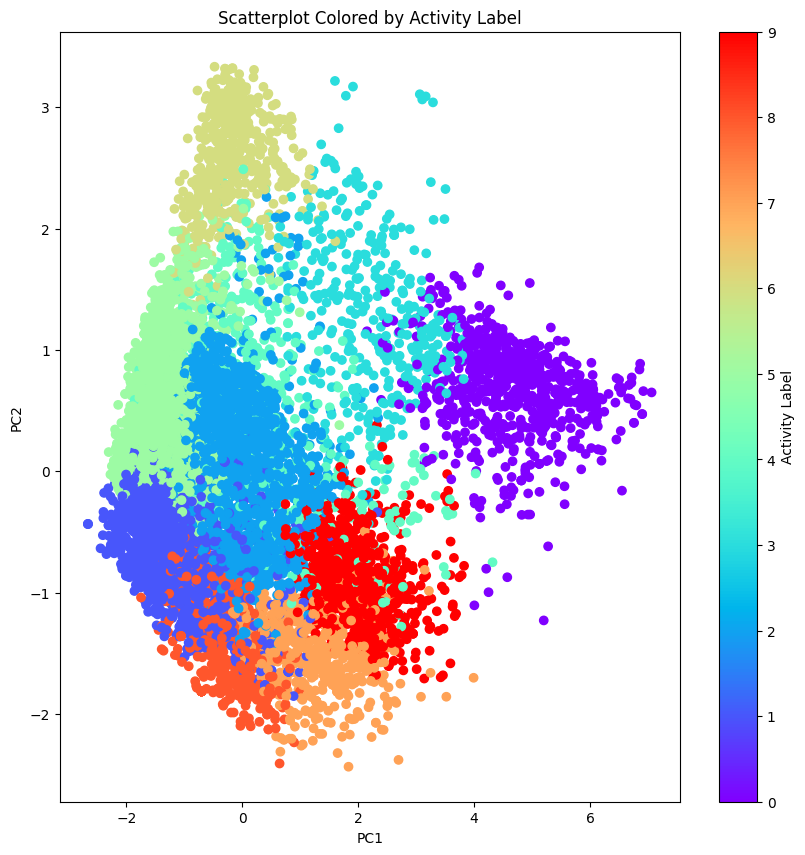

In [25]:
#the data colored by the pca-transformed hierarchical cluster label

# Copy data and add the 'label' column
data = pca_scaled_x.copy()
data = pd.DataFrame(data)
data['label'] = hclust_labels_pca

# Plot scatterplot
plt.figure(figsize=(10, 10))

# Use .iloc to access specific columns, and use 'label' for the color
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c= data['label'], cmap='rainbow')

# Add axis labels and title for clarity
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatterplot Colored by Activity Label")

# Show the plot
plt.colorbar(label="Activity Label")
plt.show()

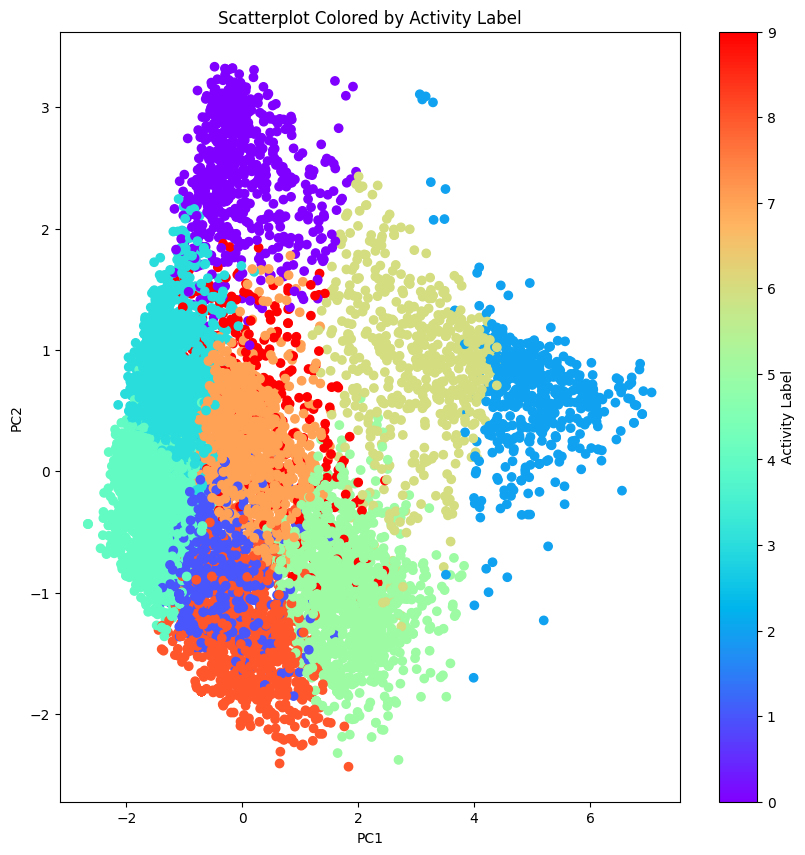

In [26]:
#the data colored by the pca-transformed  k-means cluster label

# Copy data and add the 'label' column
data = pca_scaled_x.copy()
data = pd.DataFrame(data)
data['label'] = y_kmeans_pca

# Plot scatterplot
plt.figure(figsize=(10, 10))

# Use .iloc to access specific columns, and use 'label' for the color
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c= data['label'], cmap='rainbow')

# Add axis labels and title for clarity
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatterplot Colored by Activity Label")

# Show the plot
plt.colorbar(label="Activity Label")
plt.show()

In [27]:
#TODO: Write a function that given the data and clusters
#  returns the within cluster sum of squares, WSS


def tot_within_sum_of_square(data, clusters):
    """
    Calculate the total Within-Cluster Sum of Squares (WSS).

    Parameters:
        data (pd.DataFrame or np.ndarray): Data points as a DataFrame or array.
        clusters (pd.Series or np.ndarray): Cluster labels corresponding to the data points.

    Returns:
        float: Total WSS.
    """
    # Convert to DataFrame for easier manipulation if necessary
    data = pd.DataFrame(data)
    data['cluster'] = clusters

    # Compute total WSS
    total_wss = 0
    for cluster, points in data.groupby('cluster'):
        # Calculate centroid
        centroid = points.drop(columns='cluster').mean().values
        # Calculate squared distances and sum
        total_wss += np.sum(np.sum((points.drop(columns='cluster').values - centroid) ** 2, axis=1))

    return total_wss

In [28]:
#Total With Cluster Sum of Squares for K-Means:
twcsof_kMeans_pca = tot_within_sum_of_square (pca_scaled_x, y_kmeans_pca)
#Total With Cluster Sum of Squares for hierarichal clustering:
twcsof_hclust_pca = tot_within_sum_of_square (pca_scaled_x, hclust_labels_pca)
#K-means inertia
inertia_pca = round(kmeans_pca.inertia_, 1)
#silhouette score for k-means
ss_kmeans_pca = silhouette_score(pca_scaled_x, y_kmeans_pca)
#silhouette score for hclust
ss_hclust_pca = silhouette_score(pca_scaled_x, hclust_labels_pca)
#Comparing how much clusters agree
rs_pca = rand_score(y_kmeans_pca, hclust_labels_pca)
#adjusted rand score
ars_pca = adjusted_rand_score(y_kmeans_pca, hclust_labels_pca)

# Print Results
print(f"Total With Cluster Sum of Squares for K-Means: {twcsof_kMeans_pca}")
print(f"Total With Cluster Sum of Squares for Hierarchical Clustering: {twcsof_hclust_pca}")
print(f"Inertia: {inertia_pca}")
print(f"Silhouette Score for K-Means: {ss_kmeans_pca}")
print(f"Silhouette Score for Hierarchical Clustering: {ss_hclust_pca}")
print(f"Rand Score: {rs_pca}")
print(f"Adjusted Rand Score: {ars_pca}")

Total With Cluster Sum of Squares for K-Means: 9452.51504727754
Total With Cluster Sum of Squares for Hierarchical Clustering: 11407.160257063771
Inertia: 9452.6
Silhouette Score for K-Means: 0.3023856929166431
Silhouette Score for Hierarchical Clustering: 0.24451796852395863
Rand Score: 0.8894217067933717
Adjusted Rand Score: 0.48972937083767
